# Description of project


In this project, I am going to work with the dataset based on the census data extracted from the 1994 and 1995 current population surveys conducted by the U.S. Census Bureau. Your goal is to predict level of income of a person: "- 50000" (means less than \$50k/year) or "50000+" (means more than \$50k/year). The data is split into train (`train.csv`) and test (`test.csv`) parts.

The description of the data is available here: https://archive.ics.uci.edu/ml/datasets/Census-Income+%28KDD%29

_Citation:_

* _Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science._

## Detailed Task Description:

####  1. Data exploration
#### 2. Data preprocessing
#### 3. Model training
####  4. Summary


### 1. Data exploration

In [1634]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer, StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from datetime import datetime
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import time
import seaborn as sns
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.pipeline import FeatureUnion
from sklearn.model_selection import cross_val_score
from pandas.api.types import CategoricalDtype
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeClassifier
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingClassifier

In [1527]:
train_data = pd.read_csv('census-income.data')
test_data = pd.read_csv('census-income.test')

In [1528]:
train_data.head(15).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
73,58,18,9,10,48,42,28,47,34,8,32,51,46,26,13
Not in universe,Self-employed-not incorporated,Not in universe,Not in universe,Not in universe,Private,Private,Private,Local government,Private,Not in universe,Not in universe,Private,Private,Private,Not in universe
0,4,0,0,0,40,34,4,43,4,0,0,4,37,24,0
0.1,34,0,0,0,10,3,40,26,37,0,0,34,31,12,0
High school graduate,Some college but no degree,10th grade,Children,Children,Some college but no degree,Bachelors degree(BA AB BS),High school graduate,Some college but no degree,Some college but no degree,Children,High school graduate,Some college but no degree,High school graduate,Bachelors degree(BA AB BS),Children
0.2,0,0,0,0,1200,0,0,876,0,0,0,0,0,0,0
Not in universe.1,Not in universe,High school,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe,Not in universe
Widowed,Divorced,Never married,Never married,Never married,Married-civilian spouse present,Married-civilian spouse present,Never married,Married-civilian spouse present,Married-civilian spouse present,Never married,Never married,Married-civilian spouse present,Divorced,Never married,Never married
Not in universe or children,Construction,Not in universe or children,Not in universe or children,Not in universe or children,Entertainment,Finance insurance and real estate,Construction,Education,Construction,Not in universe or children,Not in universe or children,Construction,Business and repair services,Manufacturing-nondurable goods,Not in universe or children
Not in universe.2,Precision production craft & repair,Not in universe,Not in universe,Not in universe,Professional specialty,Executive admin and managerial,Handlers equip cleaners etc,Adm support including clerical,Machine operators assmblrs & inspctrs,Not in universe,Not in universe,Precision production craft & repair,Other service,Professional specialty,Not in universe


 Census-related numbers are used to distribute  federal funds to various states and local governments. Additionally, census data is  used for post-census population estimates and projections, economic and social science research, and many other similar uses. Therefore, the importance of this data and its accurate predictions is very clear to us.

The table looks weird, but we know detailing the meaning of the variable information about database - the following mappings to the Census Bureau's internal database column names will be needed: 
- age
- class of worker
- industry code
- occupation code
- adjusted gross income
- education
- wage per hour
- enrolled in edu inst last wk
- marital status
- major industry code
- major occupation code
- mace
- hispanic Origin
- sex
- member of a labor union
- reason for unemployment
- full or part time employment stat
- capital gains
- capital losses
- divdends from stocks
- federal income tax liability
- tax filer status
- region of previous residence
- state of previous residence
- detailed household and family stat	
- detailed household summary in household
- instance weight					
- migration code-change in msa			
- migration code-change in reg			
- migration code-move within reg			
- live in this house 1 year ago			
- migration prev res in sunbelt			
- num persons worked for employer			
- family members under 18				
- total person earnings				
- country of birth father				
- country of birth mother				
- country of birth self				
- citizenship					
- total person income				
- own business or self employed			
- taxable income amount			
- fill inc questionnaire for veteran's admin	
- veterans benefits		
- weeks worked in year		
- income

We should assign the column names manually:

In [1529]:
cols = ["age", "class_worker", "ind_code", "occupation_code", "education", 
        "wage_per_hour", "enrolled_edu", "marital_status", "major_ind_code", 
        "major_occ_code", "race", "hispanic_origin", "sex", "union_member", "reason_unemployment", 
        "full_or_part_emp", "capital_gains", "capital_losses",
        "divdends_stocks", "tax_filer_status", "region_prev_res", "state_prev_residence", 
        "detailed_household_family_stat", "detailed_household_summary", 
        "instance_weight", "migr_code_msa", "migr_code_reg", "migr_code_with_reg", 
        "live_in_this_house_1_year_ago", "migr_prev_sunbelt", "num_persons_worked", "family_under_18",
        "country_father", "country_mother", "country_birth_self", 
        "citizenship", "own_or_self" , "veteran_question", "veteran_benefits", "weeks_worked_in_year",
        "survey_year", "income_50k"]
len(cols)

42

1.1. Missing values ​​in the dataset are indicated by a '?'. Specify missing values ​​using the na_values ​​parameter.

The test data set has a strange first row, so I use "skiprows=1" to skip the first row

In [1530]:
train_data = pd.read_csv('census-income.data', names = cols, sep=' *, *', skiprows =1, na_values='?', engine='python')
test_data = pd.read_csv('census-income.test', names = cols, sep=' *, *', skiprows =1, na_values='?', engine='python')

In [1531]:
train_data.shape

(199522, 42)

In [1532]:
test_data.shape

(99761, 42)

Dataset looks better, but we should check values:

In [1533]:
train_data.describe(include='all').round()

,age,class_worker,ind_code,occupation_code,education,wage_per_hour,enrolled_edu,marital_status,major_ind_code,major_occ_code,...,country_father,country_mother,country_birth_self,citizenship,own_or_self,veteran_question,veteran_benefits,weeks_worked_in_year,survey_year,income_50k
count,199522.0,199522,199522.0,199522.0,199522,199522.0,199522,199522,199522,199522,...,192809,193403,196129,199522,199522.0,199522,199522.0,199522.0,199522.0,199522
unique,NaN,9,NaN,NaN,17,NaN,3,7,24,15,...,42,42,42,5,NaN,3,NaN,NaN,NaN,2
top,NaN,Not in universe,NaN,NaN,High school graduate,NaN,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,NaN,Not in universe,NaN,NaN,NaN,- 50000.
freq,NaN,100244,NaN,NaN,48406,NaN,186942,86485,100683,100683,...,159162,160478,176988,176991,NaN,197538,NaN,NaN,NaN,187140
mean,34.0,NaN,15.0,11.0,NaN,55.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,2.0,23.0,94.0,NaN
std,22.0,NaN,18.0,14.0,NaN,275.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,1.0,24.0,1.0,NaN
min,0.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,94.0,NaN
25%,15.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,2.0,0.0,94.0,NaN
50%,33.0,NaN,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,2.0,8.0,94.0,NaN
75%,50.0,NaN,33.0,26.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,2.0,52.0,95.0,NaN


In [1534]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199522 entries, 0 to 199521
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             199522 non-null  int64  
 1   class_worker                    199522 non-null  object 
 2   ind_code                        199522 non-null  int64  
 3   occupation_code                 199522 non-null  int64  
 4   education                       199522 non-null  object 
 5   wage_per_hour                   199522 non-null  int64  
 6   enrolled_edu                    199522 non-null  object 
 7   marital_status                  199522 non-null  object 
 8   major_ind_code                  199522 non-null  object 
 9   major_occ_code                  199522 non-null  object 
 10  race                            199522 non-null  object 
 11  hispanic_origin                 198648 non-null  object 
 12  sex             

Let's look for any missing values in both the train and the test dataset. We need to fill/remove these values

In [1535]:
train_data.isnull().sum()

age                                   0
class_worker                          0
ind_code                              0
occupation_code                       0
education                             0
wage_per_hour                         0
enrolled_edu                          0
marital_status                        0
major_ind_code                        0
major_occ_code                        0
race                                  0
hispanic_origin                     874
sex                                   0
union_member                          0
reason_unemployment                   0
full_or_part_emp                      0
capital_gains                         0
capital_losses                        0
divdends_stocks                       0
tax_filer_status                      0
region_prev_res                       0
state_prev_residence                708
detailed_household_family_stat        0
detailed_household_summary            0
instance_weight                       0


In [1536]:
test_data.isnull().sum()

age                                   0
class_worker                          0
ind_code                              0
occupation_code                       0
education                             0
wage_per_hour                         0
enrolled_edu                          0
marital_status                        0
major_ind_code                        0
major_occ_code                        0
race                                  0
hispanic_origin                     405
sex                                   0
union_member                          0
reason_unemployment                   0
full_or_part_emp                      0
capital_gains                         0
capital_losses                        0
divdends_stocks                       0
tax_filer_status                      0
region_prev_res                       0
state_prev_residence                330
detailed_household_family_stat        0
detailed_household_summary            0
instance_weight                       0


### 2. Data preprocessing

1.2. We should drop certain features from the dataset. The reasons for doing so are as follows:

1. Specificity of Data: Features such as `hispanic_origin`, `live_in_this_house_1_year_ago`,`country_father`, `survey_year`  and `country_mother` contain information that is too specific or not relevant to the analysis of prediction task.

3. Multicollinearity: The feature `ind_code`, `occupation_code`, `enrolled_edu`, `major_ind_code`, `region_prev_res`, `state_prev_residence`, `'migr_code_msa', 'migr_code_reg', 'migr_code_with_reg', 'migr_prev_sunbelt'`and `veteran_question` exhibits multicollinearity. It may has beneficial to drop to prevent any potential bias in the analysis.

4. Text-based columns: these columns would require more complicated text analysis to use in a linear regression model: `detailed_household_family_stat` and `detailed_household_family_summary`


In [1537]:
drop_cols =['ind_code', 'occupation_code', 'enrolled_edu', 'major_ind_code', 'region_prev_res', 'state_prev_residence', 'veteran_question', 'hispanic_origin', 'live_in_this_house_1_year_ago', 'country_father', 'survey_year', 'country_mother','detailed_household_summary','detailed_household_family_stat', 'migr_code_msa',
            'migr_code_reg', 'migr_code_with_reg', 'migr_prev_sunbelt']
len(drop_cols)

18

In [1538]:
train_data = train_data.drop(columns=drop_cols)
test_data = test_data.drop(columns=drop_cols)

In [1539]:
test_data.isnull().sum()

age                        0
class_worker               0
education                  0
wage_per_hour              0
marital_status             0
major_occ_code             0
race                       0
sex                        0
union_member               0
reason_unemployment        0
full_or_part_emp           0
capital_gains              0
capital_losses             0
divdends_stocks            0
tax_filer_status           0
instance_weight            0
num_persons_worked         0
family_under_18            0
country_birth_self      1764
citizenship                0
own_or_self                0
veteran_benefits           0
weeks_worked_in_year       0
income_50k                 0
dtype: int64

In [1540]:
train_data.isnull().sum()

age                        0
class_worker               0
education                  0
wage_per_hour              0
marital_status             0
major_occ_code             0
race                       0
sex                        0
union_member               0
reason_unemployment        0
full_or_part_emp           0
capital_gains              0
capital_losses             0
divdends_stocks            0
tax_filer_status           0
instance_weight            0
num_persons_worked         0
family_under_18            0
country_birth_self      3393
citizenship                0
own_or_self                0
veteran_benefits           0
weeks_worked_in_year       0
income_50k                 0
dtype: int64

In [1541]:
obj = train_data.select_dtypes(include='object')
for col in obj:
    print('column:', col, obj[col].unique(), 'len:',len(obj[col].unique()))

column: class_worker ['Self-employed-not incorporated' 'Not in universe' 'Private'
 'Local government' 'Federal government' 'Self-employed-incorporated'
 'State government' 'Never worked' 'Without pay'] len: 9
column: education ['Some college but no degree' '10th grade' 'Children'
 'Bachelors degree(BA AB BS)' 'High school graduate'
 'Masters degree(MA MS MEng MEd MSW MBA)' 'Less than 1st grade'
 'Associates degree-academic program' '7th and 8th grade'
 '12th grade no diploma' 'Associates degree-occup /vocational'
 'Prof school degree (MD DDS DVM LLB JD)' '5th or 6th grade' '11th grade'
 'Doctorate degree(PhD EdD)' '9th grade' '1st 2nd 3rd or 4th grade'] len: 17
column: marital_status ['Divorced' 'Never married' 'Married-civilian spouse present' 'Widowed'
 'Separated' 'Married-spouse absent' 'Married-A F spouse present'] len: 7
column: major_occ_code ['Precision production craft & repair' 'Not in universe'
 'Professional specialty' 'Executive admin and managerial'
 'Handlers equip clea

We can see a lot of “Not in Universe”, which implies that the person was not a part of the population to which the question was directed. The target population is called the question universe, and you can tell who was meant to be included in the universe in a variable’s Universe Statement

In [1542]:
train_data = train_data.replace('Not in universe', 'Other')
test_data = test_data.replace('Not in universe', 'Other')

1.3. Select target variable, explain choice. Separate target variable from the feature matrix:


- In this case, it's better to choose either the `income_50k` variable. The target variable predicts if the income is higher or lower than 50K$.


In [1543]:
target_value = ['income_50k']

1.4 Metric selection. 

- Since the task is classification (predicting `income_50k`), accuracy might be a good metric to start with. However, given the possibility of class imbalance, additional metrics such as precision and recall 

1.5 Verification strategy.

- Because of the potential for class imbalance in the target variable, stratified K-fold cross-validation may be appropriate. We could use a simple train-test split:

In [1544]:
train_data.describe()

,age,wage_per_hour,capital_gains,capital_losses,divdends_stocks,instance_weight,num_persons_worked,own_or_self,veteran_benefits,weeks_worked_in_year
count,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000,199522.000000
mean,34.494006,55.427186,434.721169,37.313975,197.530523,1740.380471,1.956190,0.175439,1.514830,23.175013
std,22.310785,274.897115,4697.542951,271.897097,1984.168581,993.770642,2.365127,0.553696,0.851475,24.411494
min,0.000000,0.000000,0.000000,0.000000,0.000000,37.870000,0.000000,0.000000,0.000000,0.000000
25%,15.000000,0.000000,0.000000,0.000000,0.000000,1061.607500,0.000000,0.000000,2.000000,0.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,1618.310000,1.000000,0.000000,2.000000,8.000000
75%,50.000000,0.000000,0.000000,0.000000,0.000000,2188.610000,4.000000,0.000000,2.000000,52.000000
max,90.000000,9999.000000,99999.000000,4608.000000,99999.000000,18656.300000,6.000000,2.000000,2.000000,52.000000


Let's visualize our data

In [1545]:
num_cols = train_data.select_dtypes(include=['int'])
print(num_cols.columns)

Index(['age', 'wage_per_hour', 'capital_gains', 'capital_losses',
       'divdends_stocks', 'num_persons_worked', 'own_or_self',
       'veteran_benefits', 'weeks_worked_in_year'],
      dtype='object')


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'wage_per_hour'}>,
        <Axes: title={'center': 'capital_gains'}>],
       [<Axes: title={'center': 'capital_losses'}>,
        <Axes: title={'center': 'divdends_stocks'}>,
        <Axes: title={'center': 'num_persons_worked'}>],
       [<Axes: title={'center': 'own_or_self'}>,
        <Axes: title={'center': 'veteran_benefits'}>,
        <Axes: title={'center': 'weeks_worked_in_year'}>]], dtype=object)

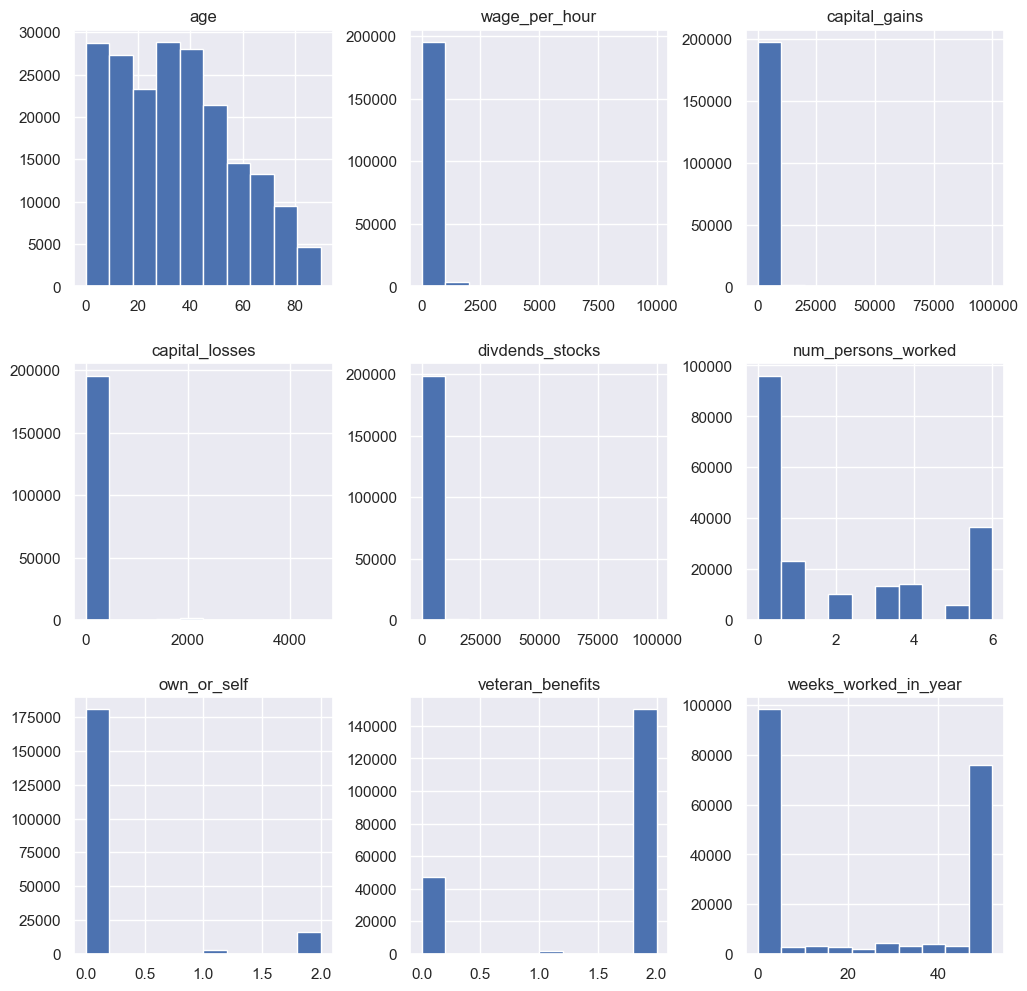

In [1546]:
num_cols.hist(figsize=(12, 12))

The scale of values is different. Many machine learning models require  features to be at the same scale. 
You can see that there are many outliers  in the data. Use `StandardScaler` from sklearn library. Let's look at the categorical data:

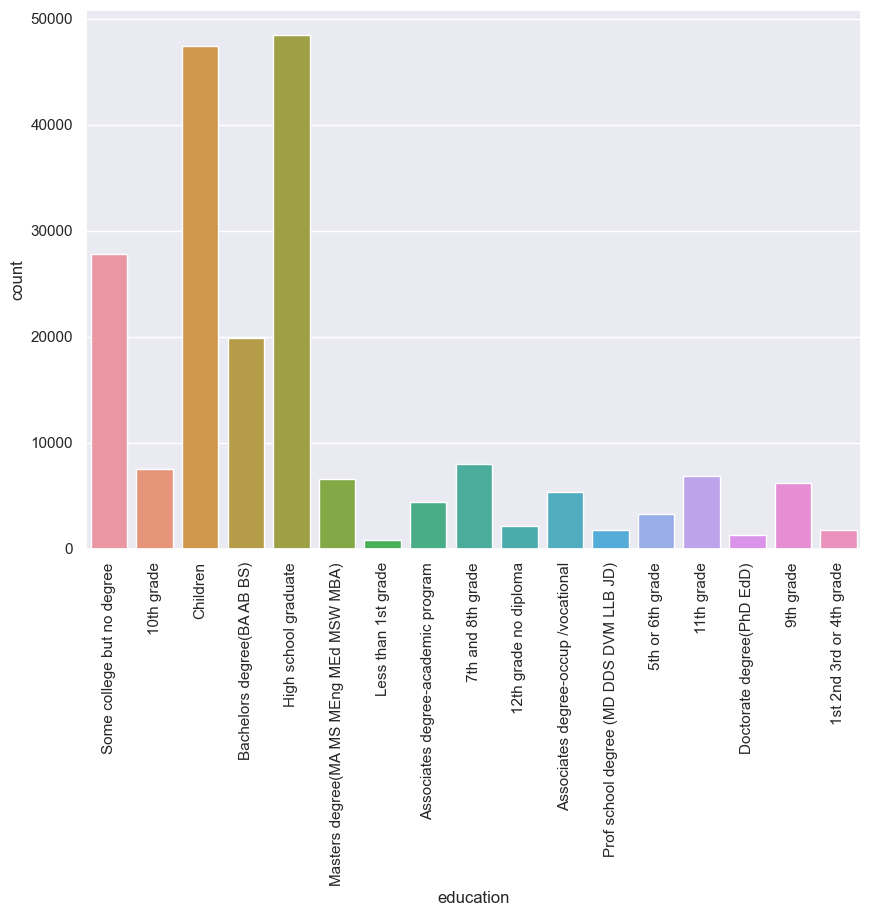

In [1547]:
sns.countplot(x='education', data=train_data)
plt.xticks(rotation = 90)
plt.show()

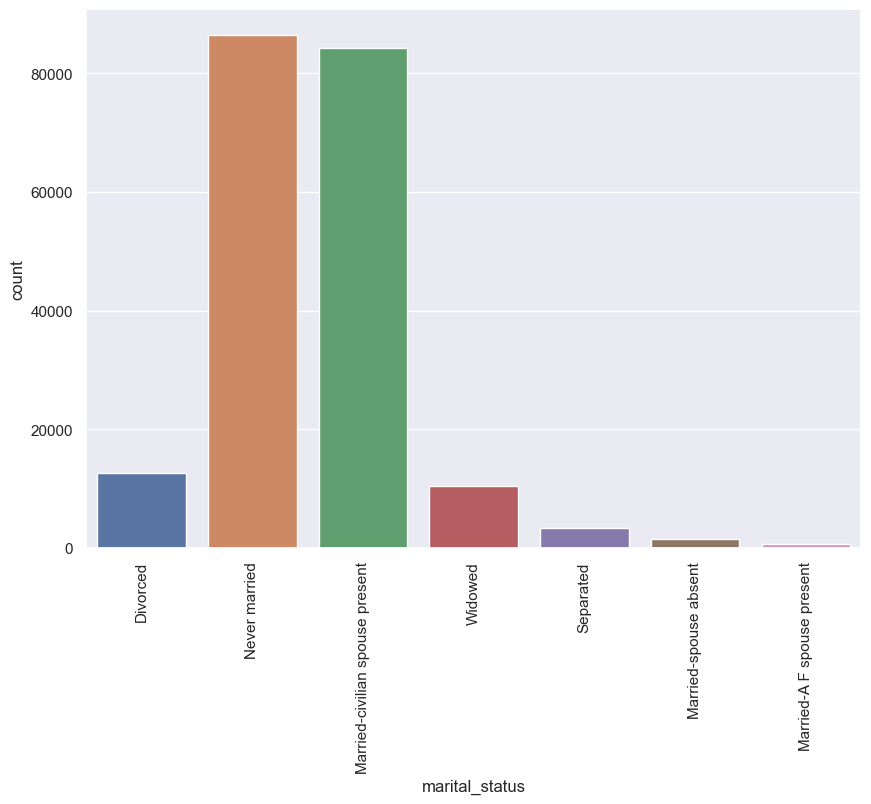

In [1548]:
sns.countplot(x='marital_status', data=train_data)
plt.xticks(rotation = 90)
plt.show()

We observe that majority of the people belong to ‘Never married’ sector maritual status

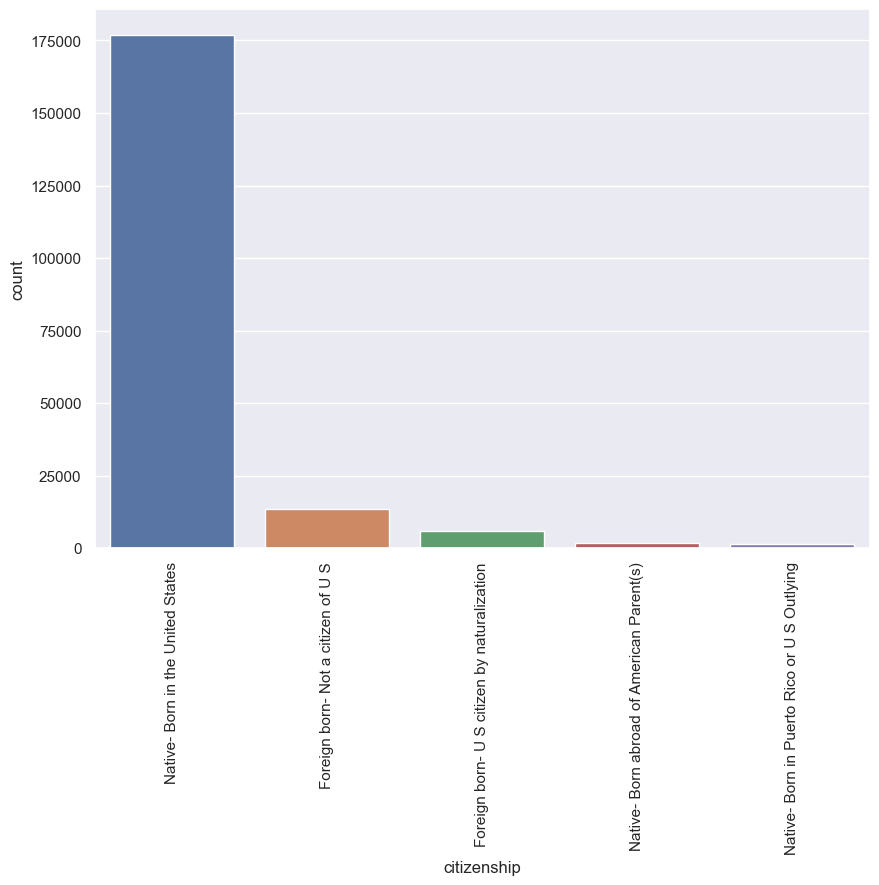

In [1549]:
sns.countplot(x='citizenship', data=train_data)
plt.xticks(rotation = 90)
plt.show()

The majority of the people was born in the United States

<Axes: xlabel='count', ylabel='class_worker'>

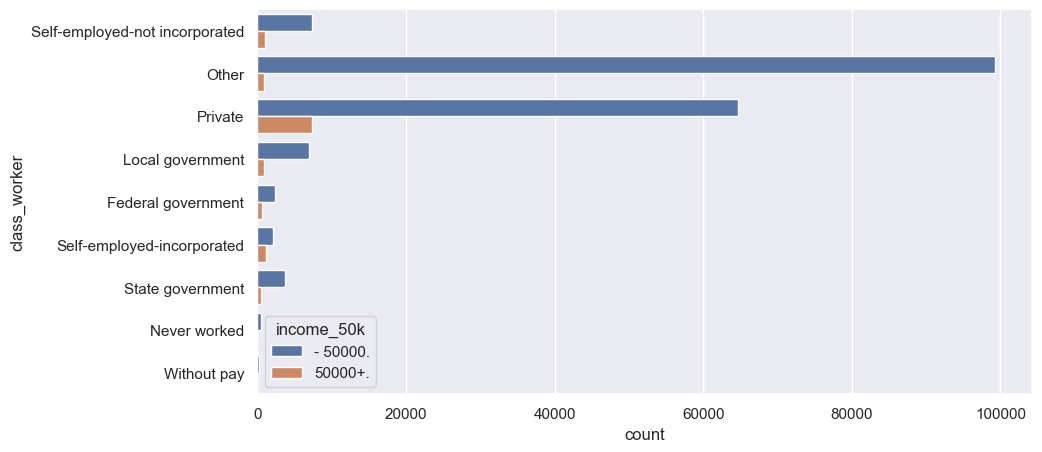

In [1550]:
cat_cols = train_data.select_dtypes(include=['object'])

sns.set(rc={'figure.figsize':(10, 5)})
sns.countplot(y='class_worker', hue='income_50k', data = cat_cols)

We observe that a lot of the people belong to ‘Private’ sector workclass.

<Axes: xlabel='count', ylabel='education'>

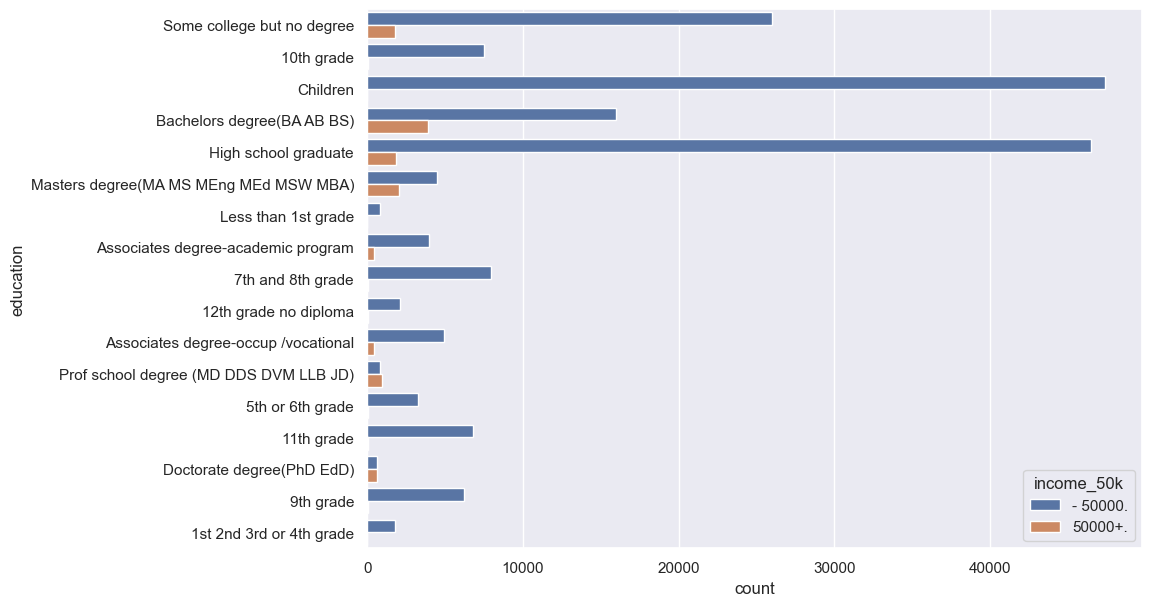

In [1551]:
sns.set(rc={'figure.figsize':(10, 7)})
sns.countplot(y='education', hue='income_50k', data = cat_cols)

We should treat numeric and categorical attributes separately. Numeric attributes need to be scaled and missing values ​​need to be filled before categorical values ​​are encoded into numbers. Use the sklearn pipeline to apply this transformation sequence. We  also build custom transformers that can be used directly in Pipeline.

In [1553]:
class ColumnsSelector(BaseEstimator, TransformerMixin):
    def __init__(self, data_type='all'):
        self.data_type = data_type
        
    def fit(self, X, y=None):
        return self

    def transform(self, X):
        if self.data_type == 'categorical':
            return X.select_dtypes(include=['object'])
        elif self.data_type == 'numerical':
            return X.select_dtypes(include=['float', 'int'])
        else:
            return X


In [1554]:
num_pipeline = Pipeline(steps=[
    ("num_attr_selector", ColumnsSelector(data_type='numerical')),
    ("scaler", StandardScaler())
])

We can apply Principal component analysis on the given dataset and find out the dimensions(also known as components) with maximum variance(where the data is spread out). Features with little variance in the data are then projected into new lower dimension. Then the models are trained on transformed dataset to apply machine learning models.

In [1555]:
pca = PCA()
pca.fit(trans_train_data)
pca_train = pca.transform(trans_train_data)

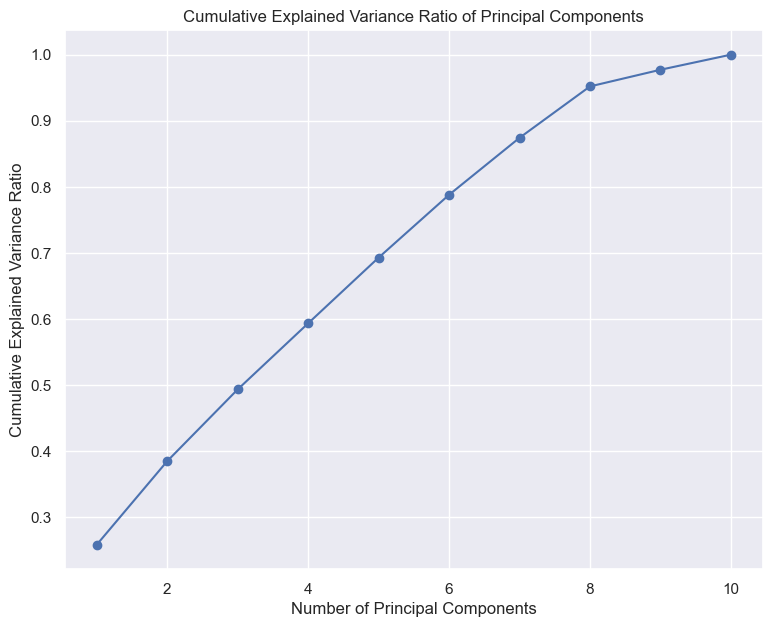

In [1556]:
exp_var_ratio = pca.explained_variance_ratio_
cumul_var_ratio = exp_var_ratio.cumsum()

# Plot the cumulative explained variance ratio
plt.figure(figsize=(9, 7))
plt.plot(range(1, len(cumul_var_ratio) + 1), cumul_var_ratio, marker='o', linestyle='-')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio of Principal Components')
plt.grid(True)
plt.show()

As we can see, we can easily retain 95% of the total variance, so we can safely drop the last two components ('veteran_benefits', 'weeks_worked_in_year') as they just explain 5% of the total variance.

<h5> Handling missing values </h5>

I need to replace  missing values ​​in a categorical column. Replace missing values ​​with the most frequently occurring value in each column. sklearn comes with Imputer to handle missing values. However, Imputer  only processes numbers. Create a custom transformer that accepts a list of columns whose missing values ​​should be replaced and a strategy for filling in the missing values.

In [1557]:
class CategoricalImputer(BaseEstimator, TransformerMixin):
  
  def __init__(self, columns = None, strategy='most_frequent'):
    self.columns = columns
    self.strategy = strategy
    
    
  def fit(self,X, y=None):
    if self.columns == None:
      self.columns = X.columns
    
    if self.strategy == 'most_frequent':
      self.fill = {column: X[column].value_counts().index[0] for column in self.columns}
    else:
      self.fill ={column: '0' for column in self.columns}
      
    return self
      
  def transform(self,X):
    X_copy = X.copy()
    for column in self.columns:
      X_copy[column] = X_copy[column].fillna(self.fill[column])
    return X_copy
     

 <h5>Encode categorical values ​​to numbers </h5> 

All  machine learning models expect numbers. I need to convert a categorical column to numeric. We encode our categorical columns using ‘Label Encoder’

In [1559]:
class CategoricalEncoder(BaseEstimator, TransformerMixin):
  
  def __init__(self):
    self.label_encoders = {}
    
  def fit(self, X, y=None):
    X_copy = X.copy()
    X_copy = X_copy.select_dtypes(include=['object'])
    for column in X_copy.columns:
      label_encoder = LabelEncoder()
      label_encoder.fit(X_copy[column])
      self.label_encoders[column] = label_encoder
    return self
    
  def transform(self, X):
    X_copy = X.copy()
    X_copy = X_copy.select_dtypes(include=['object'])
    for column in X_copy.columns:
      X_copy[column] = self.label_encoders[column].transform(X_copy[column])
    return X_copy

In [1560]:
cat_pipeline = Pipeline(steps=[
    ("cat_attr_selector", ColumnsSelector(data_type='categorical')),
    ("cat_imputer", CategoricalImputer()),
    ("encoder", CategoricalEncoder())
])

In [1561]:
transf_train_data = cat_pipeline.fit_transform(train_data)
transf_train_data

,class_worker,education,marital_status,major_occ_code,race,sex,union_member,reason_unemployment,full_or_part_emp,tax_filer_status,family_under_18,country_birth_self,citizenship,income_50k
0,6,16,0,8,4,1,1,3,0,0,4,39,4,0
1,3,0,4,6,1,0,1,3,2,4,4,40,0,0
2,3,10,4,6,4,0,1,3,0,4,0,39,4,0
3,3,10,4,6,4,0,1,3,0,4,0,39,4,0
4,4,16,2,10,0,0,0,3,1,2,4,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199517,3,5,2,6,4,1,1,3,2,1,4,39,4,0
199518,5,1,2,2,4,1,1,3,0,3,4,39,4,0
199519,3,16,2,6,4,1,1,3,0,2,4,10,1,0
199520,3,0,4,6,4,0,1,3,2,4,0,39,4,0


Let's implement pipelines for categorical and numerical columns:

In [1562]:
pipeline = FeatureUnion([("num_pipe", num_pipeline), ("cat_pipeline", cat_pipeline)])

We now have all the pipelines for preprocessing our data, next step is to prepare the data to be passed to the model. Drop two columns due to PCA:

In [1563]:
train_data.drop(['veteran_benefits', 'weeks_worked_in_year'], axis=1, inplace=True)
test_data.drop(['veteran_benefits', 'weeks_worked_in_year'], axis=1, inplace=True)

### 3. Model training

Preparing the data for training:

In [1564]:
train_copy = train_data.copy()
test_copy = test_data.copy()

In [1565]:
train_copy.duplicated().sum()
train_copy.drop_duplicates(inplace = True)
test_copy.duplicated().sum()
test_copy.drop_duplicates(inplace = True)

In [1571]:
train_copy["income_50k"].unique()

array(['- 50000.', '50000+.'], dtype=object)

In [1572]:
train_copy["income_50k"] = train_copy["income_50k"].apply(lambda x: 1 if x=='50000+.' else 0)
test_copy["income_50k"] = test_copy["income_50k"].apply(lambda x: 1 if x=='50000+.' else 0)

X_train = train_copy.drop('income_50k', axis =1)
y_train = pd.DataFrame(train_copy['income_50k'], columns = ['income_50k'])
X_test = test_copy.drop('income_50k', axis =1)
y_test = pd.DataFrame(test_copy['income_50k'], columns = ['income_50k'])

Training the model

In [1580]:
X_train_transformed = pd.DataFrame(pipeline.fit_transform(X_train),columns=X_train.columns)
X_test_transformed = pd.DataFrame(pipeline.fit_transform(X_test), columns=X_test.columns)

Clustering and Feature Addition. K-Means clustering.

Although these techniques address class imbalance, they also involve tradeoffs. Oversampling can lead to overfitting, and undersampling can lead to loss of useful information. Therefore,  direct incorporation into the final pipeline may not be ideal unless these tradeoffs are carefully considered.

In [1581]:
kmeans = KMeans(n_init=10, random_state=13)
kmeans.fit(X_train_transformed)

# Predict clusters for the train and test data
train_clusters = kmeans.predict(X_train_transformed)
test_clusters = kmeans.predict(X_test_transformed)

# Convert arrays back to DataFrames
X_train_transformed = pd.DataFrame(X_train_transformed, columns=X_train.columns) 
X_test_transformed = pd.DataFrame(X_test_transformed, columns=X_test.columns)
# Add cluster labels as new columns
X_train_transformed['cluster'] = train_clusters
X_test_transformed['cluster'] = test_clusters

Next, we move on to the main steps in machine learning: fitting the model and predicting the results. Fit your data to multiple classification models, compare the performance of all models, and choose the best one. I have choosen one single model - Decision Tree Classifier and two ensembles: Random Forest Classifier and Gradient Boosting Classifier

In [1593]:
models = [
    ('RandomForestClassifier', RandomForestClassifier, {
        'model__n_estimators': [10, 50, 100],
        'model__max_depth': [5, 20, 30], 
        'model__min_samples_split': [2, 10, 20],
        'model__min_samples_leaf': [1, 5, 7]
    }),
    ('GradientBoostingClassifier', GradientBoostingClassifier, {
        'model__n_estimators': [50, 100],
        'model__min_samples_split': [2, 10],
        'model__min_samples_leaf': [1, 5],
        'model__learning_rate': [0.01, 0.1, 0.2],
        'model__max_depth': [2, 3, 5],
        'model__random_state': [13]
    }),
    ('DecisionTreeClassifier', DecisionTreeClassifier, {
        'model__max_depth': [5, 10, 20], 
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [1, 2, 5],
        'model__random_state': [13]

    }),
    
]


def best_model(X_train, y_train, X_test, y_test, models):    
    best_accuracy_score = None
    best_model_name = None
    best_model = None
    y_train = y_train.values.ravel()
    y_test = y_test.values.ravel()
    
    start = time.time()
    for model_name, model_cls, param_grid in models:
        
        end = time.time()
        print(f'{model_name} in progress, time: {round(end - start,3)} seconds')

        model_pipeline = Pipeline([
            ('model', model_cls())
        ])
        
        grid_search = GridSearchCV(model_pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train, y_train)
        
        accuracy_score = grid_search.best_score_
        
        if best_accuracy_score is None or accuracy_score < best_accuracy_score:
            best_accuracy_score = accuracy_score
            best_model_name = model_name
            best_model = grid_search.best_estimator_
            best_params = grid_search.best_params_
    
    return best_accuracy_score, best_model_name, best_model, best_params


In [1594]:
best_accuracy_score, best_model_name, best_model, best_params = best_model(X_train_transformed, y_train, X_test_transformed, y_test, models)

RandomForestClassifier in progress, time: 0.0 seconds
GradientBoostingClassifier in progress, time: 774.077 seconds
DecisionTreeClassifier in progress, time: 2388.426 seconds


In [1598]:
best_accuracy_score, best_model_name, best_model, best_params

(0.947277426012322,
 'DecisionTreeClassifier',
 Pipeline(steps=[('model',
                  DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,
                                         random_state=13))]),
 {'model__max_depth': 10,
  'model__min_samples_leaf': 5,
  'model__min_samples_split': 2,
  'model__random_state': 13})

In [1601]:
best_predicted_values = best_model.predict(X_test_transformed)
print(accuracy_score(best_predicted_values, y_test.values))

0.9475399185894248


   Decision Tree Classifier: Achieved an accuracy of approximately 94.73% with hyperparameters tuned to a maximum depth of 10, minimum samples per leaf set to 5, and a random state of 13. The Decision Tree Classifier performed well with the specified hyperparameters, achieving high accuracy.

Also we can find feature importance, which allow to understand which features in a dataset are contributing most to the final prediction, and which features are less important:

In [1642]:
model = DecisionTreeClassifier(max_depth=10, min_samples_leaf=5,
                                         random_state=13)
rf_fit = model.fit(X_train_transformed, y_train)
feature_importances = rf_fit.feature_importances_

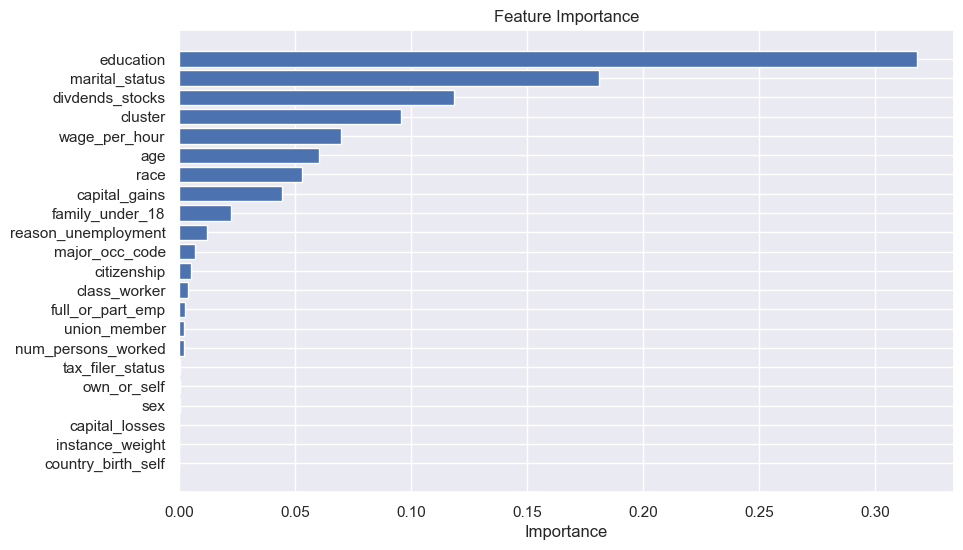

In [1644]:
feature_names = X_test_transformed.columns

feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

As we can see, we could exclude some features from our dataset: `tax_filer_status`, `own_or_self`, `sex`, `capital_losses`, `instance_weight` and `country_birth_self`

This project sought to predict individual income levels based on census data from the 1994 and 1995 Current Population Surveys. To achieve this goal, we conducted extensive data exploration, preprocessing, and model training. 
     
   `Data exploration:`

Functional analysis: Examine different functions and their distribution. Target variable analysis: We investigated the distribution of income levels ('50,000'). 
    
   `Data preprocessing:`

Missing values: Missing values were handled using appropriate imputation methods. Categorical Coding: Code categorical variables using label coding.
Feature engineering: Extracted new features and performed PCA for dimensionality reduction. 
     
   `Model training and selection:` 

I trained multiple models including RandomForestClassifier, GradientBoostingClassifier, and DecisionTreeClassifier. I optimized the hyperparameters via GridSearchCV and selected the best model based on accuracy.  DecisionTreeClassifier with specific hyperparameters was identified as the best performing model with 94.75% accuracy. 
     
   `Interpreting the best model:`

We analyzed the importance of characteristics to understand the factors that influence the prediction of income levels. Visualize feature importance to highlight the most impactful features. 
    
  `Reliability of final model:` 

The selected model showed robust performance on the test data set, with minimal differences from the training set, and good generalization.  Cross-validation and sensitivity analysis demonstrated the stability and consistency of the model's performance. Interpretability of the model  through feature importance increases reliability by providing insight into the decision-making process. After thorough evaluation and interpretability analysis,  the DecisionTreeClassifier model was found to be the best model for predicting income levels.